In [1]:
# 필요한 패키지 설치
#pip install yellowbrick
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Kmeans -> 스케일링 작업은 꼭 필수적으로!

In [5]:
#커스터머 id drop 후 사용할 데이터셋 정리
df_sp = df.drop('CustomerID',axis=1)

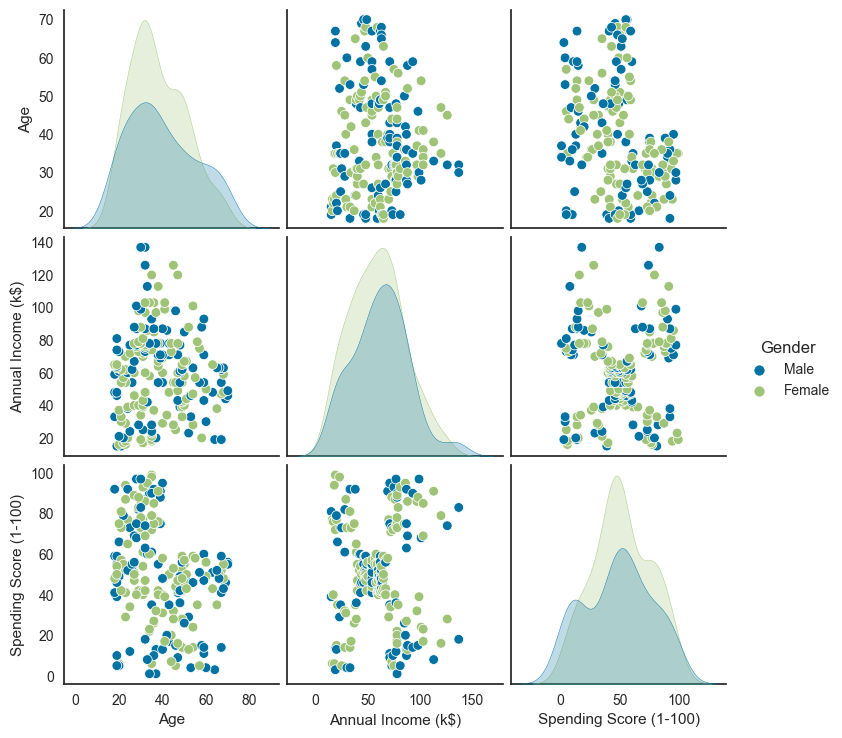

In [8]:
sns.set_style('ticks')
sns.pairplot(df_sp, hue='Gender') 
plt.show()

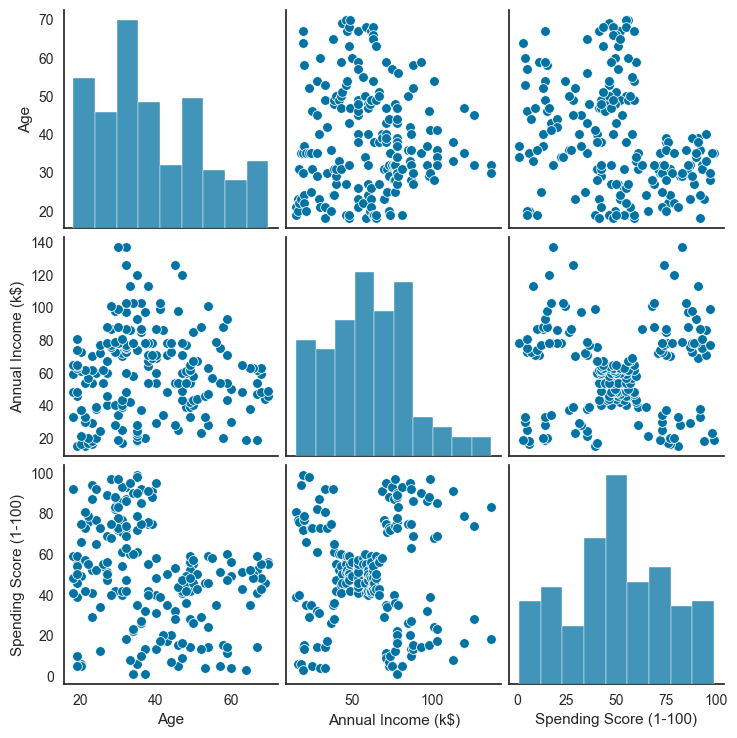

In [9]:
sns.set_style('ticks')
sns.pairplot(df_sp) 
plt.show()

- 스케일링 작업 후 kmeans 작업 진행

In [12]:
# 데이터 스케일링 진행
# 원핫인코딩 진행을 통해 gender 수치 변환
df_sp=pd.get_dummies(df_sp, columns = ['Gender'],drop_first=True)

In [16]:
#스케일링 진행
mns = MinMaxScaler()

#데이터셋을 넣어서 스케일링 진행

df_mns =mns.fit_transform(df_sp)

In [20]:
#컬럼 다시 합쳐보기

df_mns_sp = pd.DataFrame(data =df_mns, columns =df_sp.columns)

In [38]:
#kmeans_진행

kmeans_model1 = KMeans(
                    init='k-means++',
                    n_clusters = 3,
                    n_init= 10,
                    max_iter = 200,
                    random_state=111)

In [24]:
kmeans_model1

KMeans(max_iter=200, n_clusters=3, n_init=10, random_state=111)

- 데이터셋을 통해 kmeans 학습

In [25]:
kmeans_model1.fit(df_mns_sp)

KMeans(max_iter=200, n_clusters=3, n_init=10, random_state=111)

In [31]:
print(kmeans_model1.inertia_) # 최저의 SSE값을 확인
print(kmeans_model1.cluster_centers_) # 중심좌표
print(kmeans_model1.n_iter_) # 반복횟수

29.632334380252914
[[3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.68040293e-01 3.87002342e-01 3.02478134e-01 1.00000000e+00]
 [1.92307692e-01 3.87205987e-01 6.51286602e-01 1.00000000e+00]]
4


- kmeans 제공하는 함수를 통해 군집에대한 정보들을 얻을 수 있다.

## 잘 군집되었는지 평가해 보자!
- 평가하는 방법은?
- 엘보우 
- 실루엣 계수 
--- 
- 최소한 봐야하는 지표 -> 절대적인 기준을 절대 아니다.
- 꼭 비즈니스 도메인 -> 당연한 결과를 마치 인사이트를 뽑은 것처럼 이야기한다.
- 정말 군집이 이뤄졌을 때 -> 이 군집이 어떤 인사이트나 타당성을 보여줄 수 있는 피처들의 관계가 있는가?

- Elbow_ch
- 엘보우 차트

In [32]:
Elbow_ch=KElbowVisualizer(kmeans_model1) # kmeans모델 넣어서 설정하기! (우리가 지정했던 하이퍼파라미터들)

<Axes: >

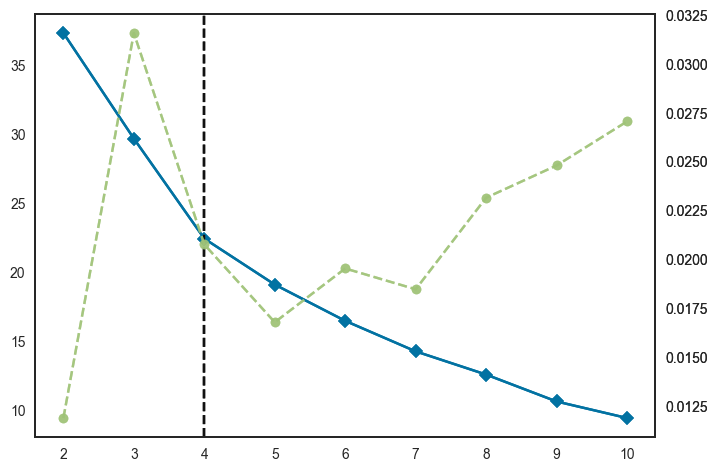

In [33]:
Elbow_ch.fit(df_mns_sp)# 학습데이터를 넣고 fit
Elbow_ch.draw() # 옐보우 그리기

- 실루엣계수 확인하기!

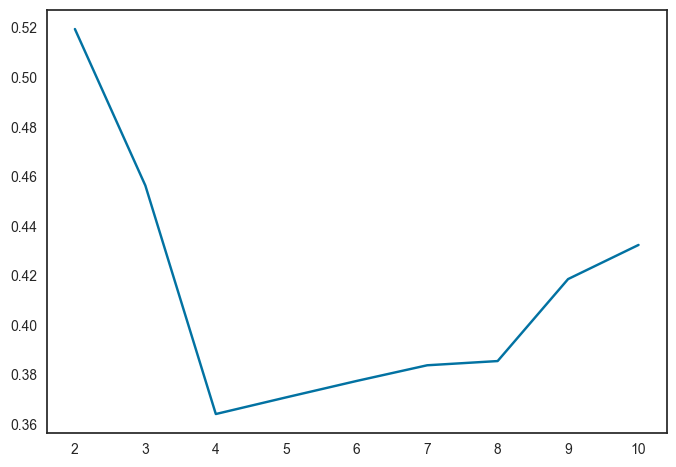

In [35]:
kmeans_model1 = {'init' : 'k-means++',
                 'n_init' : 10,
                 'max_iter' :200,
                 'random_state': 111}
                 

#실루엣 계수 저장하고 실제 그래프 생성

silhouette_coef= []

#실루엣계수 그래프 그리기 
for i in range(2,11):
    kmeans_sil = KMeans(n_clusters=i, **kmeans_model1)
    kmeans_sil.fit(df_mns_sp)
    score = silhouette_score(df_mns_sp, kmeans_sil.labels_)
    silhouette_coef.append(score)
    
plt.plot(range(2,11),silhouette_coef )
plt.xticks(range(2,11))
plt.show()

- 다른군집들과 비교했을 때 성능 (다른 군집들과 함께 그래프 그리기!)

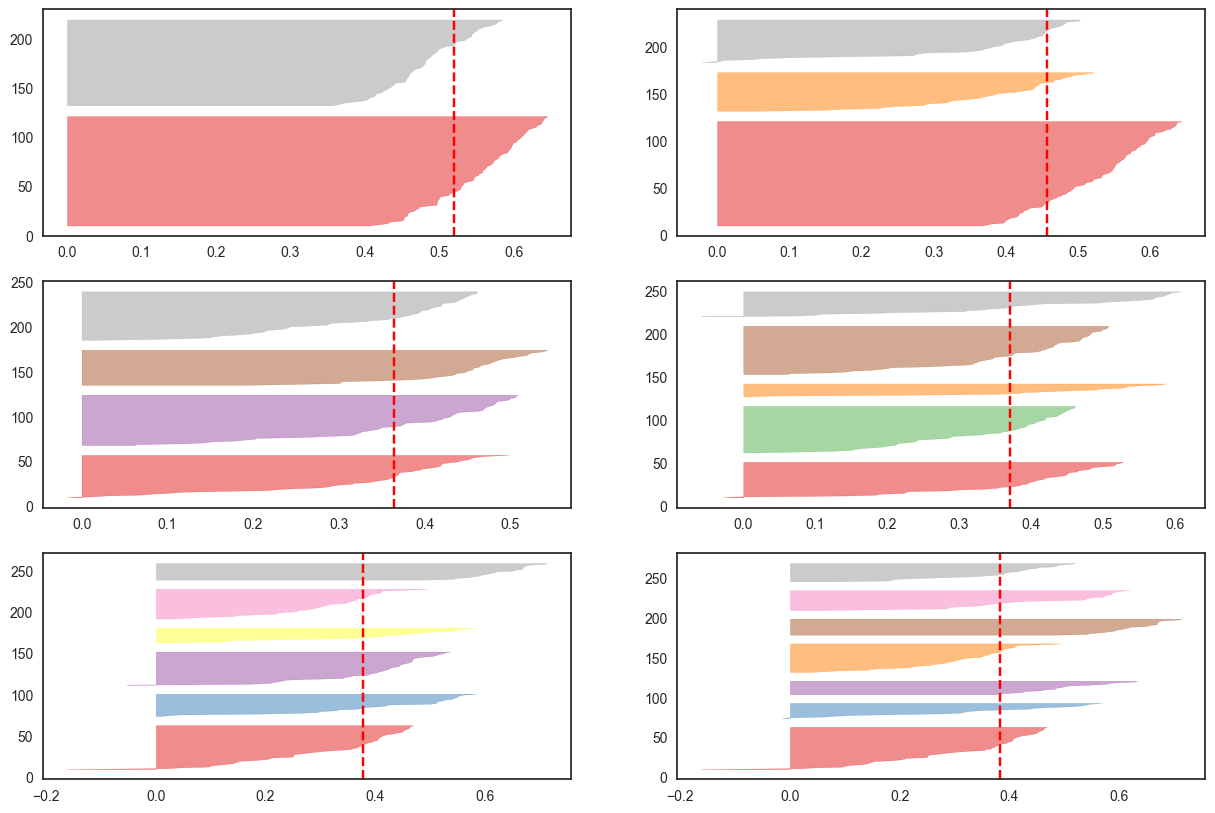

In [37]:
fig, ax = plt.subplots(3,2, figsize=(15,10))

for i in [2,3,4,5,6,7]:
    kmeans_model3 = KMeans(init='k-means++',
                    n_clusters = i,
                    n_init= 10,
                    max_iter = 200,
                    random_state=111)
    q, mod = divmod(i,2)

# 실루엣계수 시각화 
    visual = SilhouetteVisualizer(kmeans_model3, color = 'yellowbricks', ax=ax[q-1][mod])
    visual.fit(df_mns_sp)

- 군집에 대해서 실제 label을 가지고 오자!

In [43]:
kmeans_model1.fit_predict(df_mns_sp)

array([2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 2], dtype=int32)

In [46]:
df_sp['km_n']= kmeans_model1.fit_predict(df_mns_sp)

In [49]:
df_sp

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,km_n
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,0
3,23,16,77,0,0
4,31,17,40,0,0
...,...,...,...,...,...
195,35,120,79,0,0
196,45,126,28,0,0
197,32,126,74,1,2
198,32,137,18,1,1


In [51]:
df_sp.groupby('km_n')['Annual Income (k$)'].mean().to_frame()

,Annual Income (k$)
km_n,
0,59.250000
1,62.214286
2,62.239130


In [53]:
df_sp.groupby('km_n')['Age'].median().to_frame()

,Age
km_n,
0,35.0
1,52.5
2,28.0


In [54]:
df_sp.groupby('km_n')['Spending Score (1-100)'].mean().to_frame()

,Spending Score (1-100)
km_n,
0,51.526786
1,30.642857
2,64.826087


### 필수과제1
- wine_test 셋을 가지고 kmeans를 진행해서 3개의 군집 외에 다른 군집들은 어떻게 평가할 수 있는지? 위의 수업 코드로 확인하기!

## 두 번째 데이터셋을 가지고 확인하기!

In [56]:
df_wt=pd.read_csv('wine_test.csv')

In [61]:
df_wt['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

# 필수과제 2
- ### 필수과제2-1
- 이미 정해진 정답이 있는 class를 기준으로 피처들의 관계를 확인해 보시고
- 어떤 피처들이 차이가 있는지 ( 기존 정답을 기준으로 ) 정리하기


- ### 필수과제2-2
- 정답을 제외하고 kmeans로 군집화 진행하기, 내가 만든 군집과 클래스의 차이를 비교해 보기!
- kmeans, 진행시 어떤 피처를 넣는지에 따라서 정답 클래스와 내가 만든 군집이 유사한지 확인
- 이 피처를 선정하는 기준은 위에서 정답을 보고 어떤 피처들이 특징을 나눠줄 수 있는지 확인하고 ( 2-1을 하고 ) 그 근거로 데이터를 넣어서 kmenas 군집화진행 
- 모든 피처를 다 넣지말고, 하나씩 넣어보면서 다른피처들을 실제 class값의 차이가 얼마나 좁혀지는지 확인하기!

- ### 필수과제2-3
- 기존 wine_test의 class를 knn 알고리즘을 통해 정확도를 간단하게 예측해 주세요.
- 위의 피처 중에 의미 있는 피처들만 정리해서 사용하고, 해당 피처로 정확도 계산하여 예측!